In [1]:
%matplotlib widget

In [2]:
import jax.numpy as jnp
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from picasso import cic


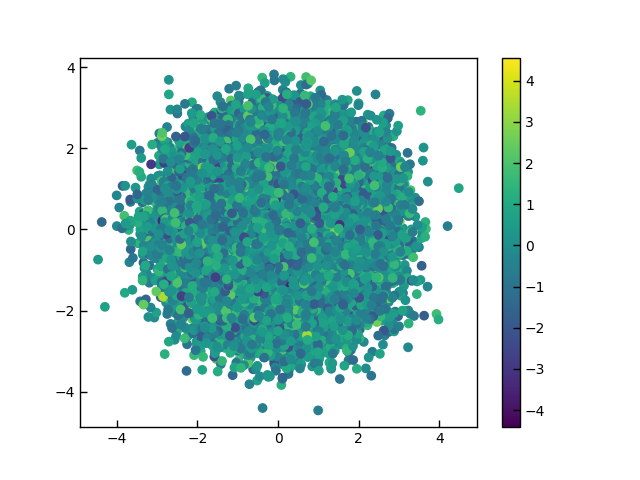

In [3]:
np.random.seed(42)
center = np.zeros(3)
n_parts = 100_000
xyz = np.random.multivariate_normal(center, np.eye(3), n_parts)

fig, ax = plt.subplots()
m = ax.scatter(xyz[:, 0], xyz[:, 1], c=xyz[:, 2])
fig.colorbar(m, ax=ax)

In [4]:
box_size = 15.0
n_cells = 101
cell_size = box_size / n_cells
grid = cic.cic_3d_nojax(xyz, np.zeros(3), box_size, n_cells, verbose=False) / (cell_size ** 3)

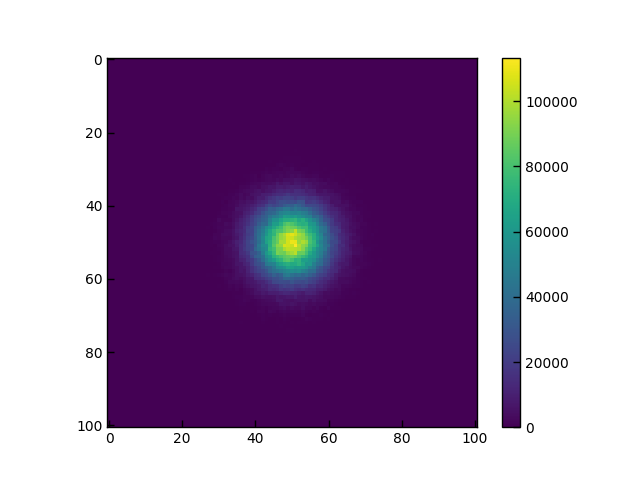

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(grid.sum(axis=-1))
fig.colorbar(im, ax=ax)

In [6]:
xyz_grid = np.array(
    np.meshgrid(
        np.linspace(-box_size / 2, box_size / 2, n_cells) + center[0],
        np.linspace(-box_size / 2, box_size / 2, n_cells) + center[1],
        np.linspace(-box_size / 2, box_size / 2, n_cells) + center[2],
    )
)

r_grid = np.sqrt(np.sum(xyz_grid**2, axis=0))

In [7]:
grid_pred = n_parts * ss.multivariate_normal(np.zeros(3), np.eye(3)).pdf(xyz_grid.T.reshape(-1, 3))

(1e-05, 552781.0652550746)

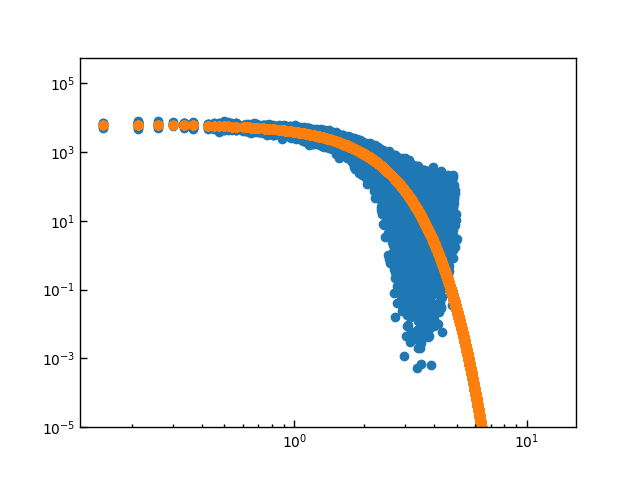

In [9]:
fig, ax = plt.subplots()
ax.scatter(r_grid.flatten(), grid.flatten())
ax.scatter(r_grid.flatten(), grid_pred.flatten())
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-5, None)